<a href="https://colab.research.google.com/github/JulianaRodriguezF/Laplace_eq/blob/main/Tarea3_Electromagnetismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import math

In [8]:
def metodo_relajacion(A, maxsi, convergencia):
    """
    Ya que tenemos la ecuacion de Laplace en 2D, esta funcion se va a encargar de implementar
    el método de relajación a una Matriz A, hasta que la suma de las diferencias absolutas entre
    el paso anterior y el proximo paso este abajo de la convergencia o el numero de iteraciones
    (maxi) sea alcanzado.

    """
    i = 0
    diff = convergencia + 1    #Suma de diferencias absolutas entre valores de la matriz A

    N, M = A.shape

    while i < maxsi and diff > convergencia:
        #Aqui se hace el ciclo en todos los puntos que estan adentro del contorno delimitado
        Atemp = A.copy()
        diff = 0.0

        for y in range(1, M - 1):
            for x in range(1, N - 1):
                A[y, x] = 0.25 * (Atemp[y, x + 1] + Atemp[y, x - 1] + Atemp[y + 1, x] + Atemp[y - 1, x])
                diff += math.fabs(A[y, x] - Atemp[y, x])

        diff /= (N * M)
        i += 1
        print(f"Iteración #{i}, diff = {diff}")

In [9]:

def condiciones_frontera(A, x, y, v0):
  """
  Establecemos condiciones de frontera de Dirichlet
  """
  a = x[-1]
  b = y[-1]

  # Condición de frontera izquierda y derecha
  A[:, 0] = 0
  A[:, -1] = 0

  # Condición de frontera inferior
  A[0, :] = -v0

  # Condición de frontera superior
  A[-1, :] = v0

  # Asignar las esquinas
  A[0, 0] = A[-1, -1] = 0

In [10]:
# Test del Programa Principal

#En esta linea de codigo, se colocan los parametros inciciales, para empezar a correr el test del programa principal dx=dy=h
input_parameters = {
    "N": 100,
    "M": 100,
    "h": 1000,
    "v_0": 200
}


x = np.linspace(0, 1, input_parameters["N"] + 2)
y = np.linspace(0, 1, input_parameters["M"] + 2)
A = np.zeros((input_parameters["M"] + 2, input_parameters["N"] + 2))

v = input_parameters["v_0"]
condiciones_frontera(A, x, y, v)
metodo_relajacion(A, input_parameters["h"], 0.00001)

#El código crea una cuadrícula de puntos en 2 dimensiones y define una matriz para almacenar coeficientes.
#Luego, establece condiciones en los bordes de la cuadrícula y utiliza un método de relajación para resolver un sistema de ecuaciones representado
#por la matriz

Iteración #1, diff = 0.9611687812379854
Iteración #2, diff = 0.7160707420222991
Iteración #3, diff = 0.5947231833910035
Iteración #4, diff = 0.5187307766243753
Iteración #5, diff = 0.4656412197231834
Iteración #6, diff = 0.4257865063917724
Iteración #7, diff = 0.3945015889321415
Iteración #8, diff = 0.369067927224505
Iteración #9, diff = 0.3478854310278799
Iteración #10, diff = 0.32987312278762226
Iteración #11, diff = 0.314323244897827
Iteración #12, diff = 0.3007130593531226
Iteración #13, diff = 0.28867685579419455
Iteración #14, diff = 0.27792774991593144
Iteración #15, diff = 0.26825580062750715
Iteración #16, diff = 0.2594889491267992
Iteración #17, diff = 0.2514971454408677
Iteración #18, diff = 0.244170181327324
Iteración #19, diff = 0.23742271549600025
Iteración #20, diff = 0.23118048301281885
Iteración #21, diff = 0.22538489182555685
Iteración #22, diff = 0.21998383805663355
Iteración #23, diff = 0.21493560324282507
Iteración #24, diff = 0.21020241107698118
Iteración #25, dif

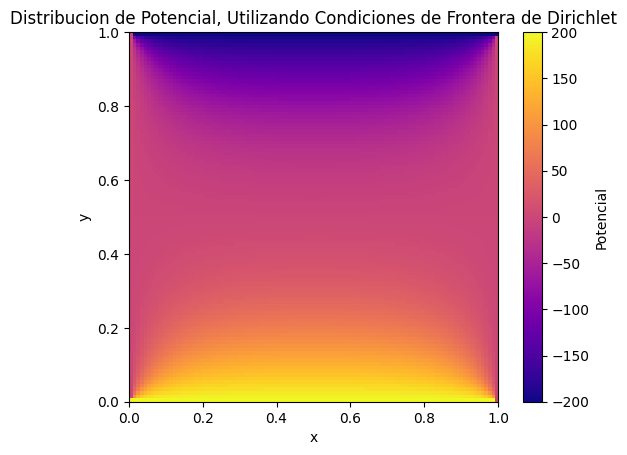

In [6]:
import matplotlib.pyplot as plt

plt.imshow(A, extent=(0, 1, 0, 1), cmap='plasma')
plt.colorbar(label="Potencial")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Distribucion de Potencial, Utilizando Condiciones de Frontera de Dirichlet")
plt.show()